In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import math
import random
import inspect
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
with open('../data/text-1.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower().replace('\n', ' ')

In [24]:
chars = sorted(set(text))

In [48]:
char2int = {c:i for i,c in enumerate(chars)}
# sot = '>'
# assert sot not in char2int
# char2int[sot] = 0
int2char = {i:c for c,i in char2int.items()}
numOfTokens = len(char2int)
print(f'{numOfTokens=}')

numOfTokens=74


In [26]:
ctxLen = 20
def getSamples():
    random.seed(123)
    samplNum = 100
    idxs = random.sample(range(0,len(text)-ctxLen), samplNum)
    X,Y = [],[]
    for i in idxs:
        X.append(text[i:i+ctxLen])
        Y.append(text[i+1:i+ctxLen+1])
    trSamplPct = 0.8
    i1 = int(trSamplPct*len(X))
    i2 = int((i1 + len(X)) / 2)
    Xtr,Ytr = X[:i1], Y[:i1]
    Xval,Yval = X[i1:i2], Y[i1:i2]
    Xtest,Ytest = X[i2:], Y[i2:]
    return (
        Xtr,Ytr,
        Xval,Yval,
        Xtest,Ytest,
    )
Xtr,Ytr, Xval,Yval, Xtest,Ytest = getSamples()

In [7]:
class Linear(nn.Module):
    def __init__(self,fanIn,fanOut,activation):
        super().__init__()
        self.lin = nn.Linear(fanIn,fanOut)
        self.act = activation
    def forward(self,x):
        y = self.lin(x)
        if self.act != None:
            y = self.act(y)
        return y

In [29]:
sm = nn.Softmax(dim=1)
x = sm(torch.randn(4,8))
x.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000])

In [30]:
class MlpPredictor(nn.Module):
    def __init__(self,numOfTokens,ctxLen,embSize):
        super().__init__()
        self.emb = nn.Embedding(numOfTokens,embSize)
        hidDim = 100
        self.layers = nn.Sequential(
            nn.Linear(ctxLen*embSize,hidDim),
            nn.LeakyReLU(),
            nn.Linear(hidDim,numOfTokens),
            nn.Softmax(dim=1)
        )
    def forward(self,x):
        x = self.emb(x)
        x = self.layers(x)
        return x

In [43]:
def print2dEmb(embLayer):
    W = embLayer.weight
    plt.figure(figsize=(8,8))
    plt.scatter(W[:,0].data,W[:,1].data,s=200)
    for i in range(W.shape[0]):
        plt.text(W[i,0].item(), W[i,1].item(), int2char[i], ha="center", va="center", color='white')
    plt.grid('minor')

In [36]:
model = MlpPredictor(numOfTokens=numOfTokens,ctxLen=ctxLen,embSize=2)
numOfParams = sum(p.nelement() for p in model.parameters())
print(f'{numOfParams=}')

numOfParams=11722


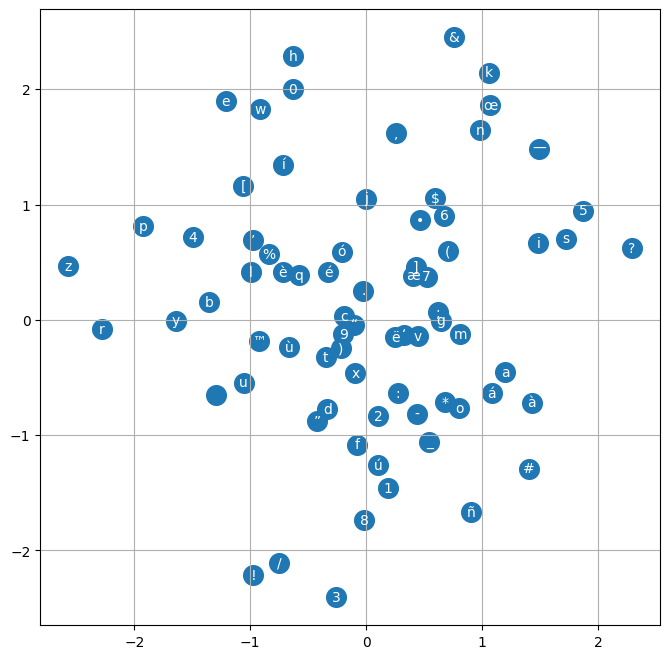

In [49]:
# sorted([n for n,v in inspect.getmembers(model.layers)])
# sorted([n for n,v in inspect.getmembers(model.emb)])
# model.emb.weight
print2dEmb(model.emb)